# Based on the Data set predict person is suffering from heart disease or not

### 1.) Importing Libraries & Data Analysis

Pandas : Pandas is a high-level data manipulation tool developed by Wes McKinney. It is built on the Numpy package and
          its key data structure is called the DataFrame. DataFrames allow you to store and manipulate tabular data in
          rows of observations and columns of variables.
            
            
Numpy  : NumPy, which stands for Numerical Python, is a library consisting of multidimensional array objects and a collection
          of routines for processing those arrays. Using NumPy, mathematical and logical operations on arrays can be performed.

        
matplot : Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.
           It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits
           like Tkinter,wxPython, Qt, or GTK+.
        
        
seaborn : statistical data visualization. Seaborn is a Python data visualization library based on matplotlib.
           It provides a high-level interface for drawing attractive and informative statistical graphics.
        
        
%matplotlib inline : Use to show diagrams below the coding section. Call it only once.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# calling our csv file (Your Dataset should be of CSV format)
# Steps to create your Excel file into CSV : Ctrl + S  } Format-->CSV

data = pd.read_csv("D:\corona\heart_Disease\heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious.
Here's what they mean,

 1.age: The person's age in years

 2.sex: The person's sex (1 = male, 0 = female)

 3.cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain,
                                          Value 4: asymptomatic)

 4.trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

 5.chol: The person's cholesterol measurement in mg/dl

 6.fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

 7.restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality,
                                        2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

 8.thalach: The person's maximum heart rate achieved

 9.exang: Exercise induced angina (1 = yes; 0 = no)

 10.oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

 11.slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

 12.ca: The number of major vessels (0-3)

 13.thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

 14.target: Heart disease (0 = no, 1 = yes)

In [3]:
# Give an complete statistical description of the Data

data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
# Gives Complete information of the data values such as Number of Data present, Null or Not-Null, Data type

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### 2.) Feature Engineering

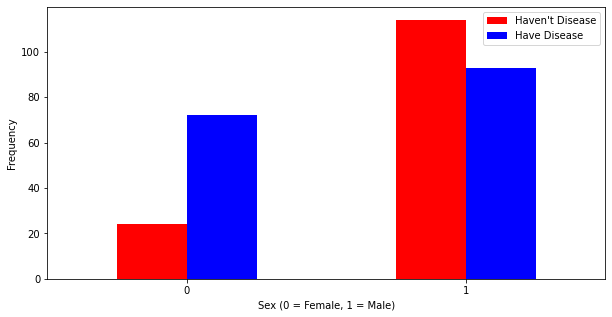

In [5]:
# This will show us people who suffer from heart desiese with respect to the sex i.e Male and Female

pd.crosstab(data.sex, data.target).plot(kind="bar",figsize=(10,5),color=['red','blue' ])

plt.xlabel('Sex (0 = Female, 1 = Male)')             # X-Label 

plt.xticks(rotation=0)                               #Get or set the current tick locations and labels of the x-axis.

plt.legend(["Haven't Disease", "Have Disease"])      # legend = Index

plt.ylabel('Frequency')                              # X-Label

plt.show()                                           # Help to show our diagram

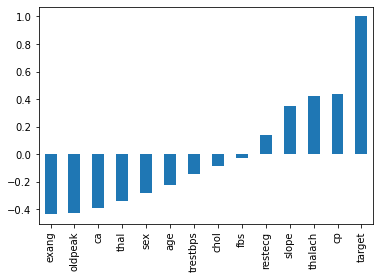

In [6]:
# This will show you the co-orelation between features respect to our target val

# .corr        : Help us to show the correlation between the values
# .sort_values : By default assendig = True
# .plot        : Use to plot
# kind=" "     : ‘bar’ or ‘barh’ for bar plots, ‘hist’ for histogram,‘box’ for boxplot,‘kde’ or ‘density’ for density plots,
#                area’ for area plots,‘scatter’ for scatter plots,‘hexbin’ for hexagonal bin plots,‘pie’ for pie plots

data.corr()['target'].sort_values().plot(kind='bar')

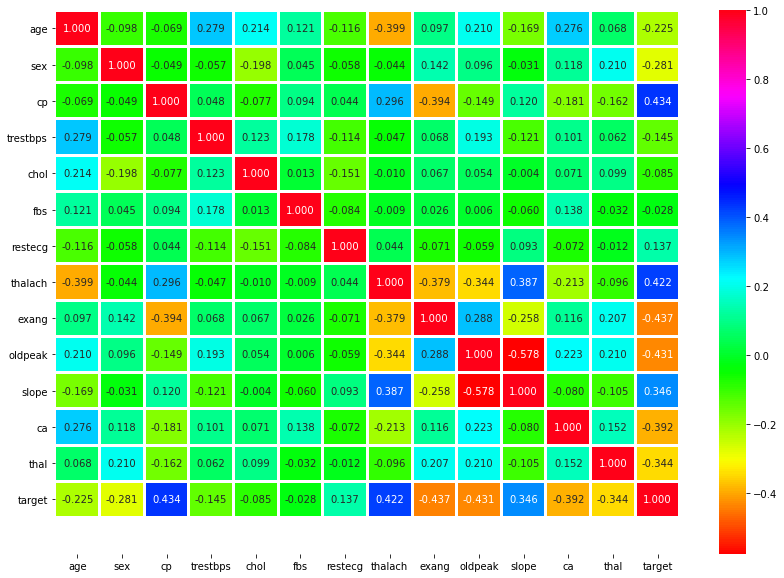

In [7]:
# This will give the correlation between that features

# Example : age in Y-axis and age in X-axis will have the maximum correlation that's why it's dark in color

plt.figure(figsize=(14,10))                                       # Help to set figure size                                     

sns.heatmap(data.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)    
         
# annot : Help to see the value in box
# cmap : The mapping from data values to color space.
# fmt : String formatting code to use when adding annotations.

plt.ylim(15,0)                                                     # show us exact number of values we want
plt.show()

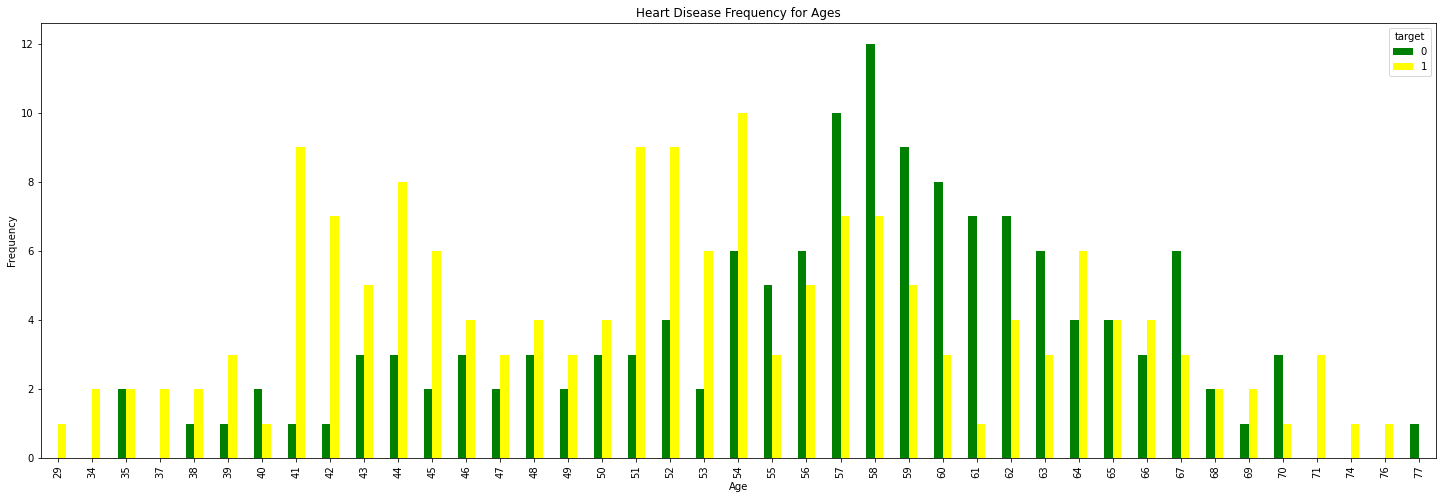

In [8]:
# This will show us Heart Disease Frequency for Ages

pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(25,8),color=['green','yellow' ]) 

# Target : YES/NO
# color : Green / Yellow

plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### Creating Dummy Variables for categorical data

In [9]:
# Categorical Variables : Categorical Variables are the variables that falls into certain categories.
#                         In Categorical Variable there is no order.

# https://www.infinitycodex.in/dummy-variable-in-machine-learning-what }  Visit this if you want to know about dummy variables
# https://www.infinitycodex.in/categoricaldummy-varibles-one-hot  }  Visit this if you want to know more about dummy variables

data = pd.get_dummies(data, columns=['cp','slope','thal','restecg'], drop_first=True)
data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,slope_1,slope_2,thal_1,thal_2,thal_3,restecg_1,restecg_2
0,63,1,145,233,1,150,0,2.3,0,1,0,0,1,0,0,1,0,0,0,0
1,37,1,130,250,0,187,0,3.5,0,1,0,1,0,0,0,0,1,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,1,0,0,0,1,0,1,0,0,0
3,56,1,120,236,0,178,0,0.8,0,1,1,0,0,0,1,0,1,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,0,0,0,0,1,0,1,0,1,0


### 3.) Spliting Data into Training & Testing set

In [10]:
# The train_test_split function is for splitting a single dataset for two different purposes: training and testing.The testing 
# subset is for building your model.The testing subset is for using the model on unknown data to evaluate the performance of
# the model.


# train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and
# for testing data. With this function, you don't need to divide the dataset manually.By default,Sklearn train_test_split will
# make random partitions for the two subsets. However, you can also specify a random state for the operation.



# .values      : This returns back the numpy array
# X, y         : The first parameter is the dataset you're selecting to use.
# train_size   : This parameter sets the size of the training dataset. There are three options: None, which is the default,
#                Int, which requires the exact number of samples, and float, which ranges from 0.1 to 1.0.
# test_size    : This parameter specifies the size of the testing dataset. The default state suits the training size.
#                It will be set to 0.25 if the training size is set to default.
# random_state : The default mode performs a random split using np.random. Alternatively, you can add an integer using an
#                exact number.


from sklearn.model_selection import train_test_split

X = data.drop('target', axis=1).values
y = data['target'].values

In [11]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html } for complete knowledge

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### 4.) Normalization

In [12]:
# Database normalization is the process of structuring a relational database in accordance with a series of so-called
#  normal forms in order to reduce data redundancy and improve data integrity.



# Transform features by scaling each feature to a given range.

# MinMaxScaler : This estimator scales and translates each feature individually such that it is in the given range on 
#                the training set, e.g. between zero and one.



# By fit the imputer calculates the means of columns from some data, and by transform it applies those means to some data
# (which is just replacing missing values with the means). If both these data are the same (i.e. the data for calculating the
# means and the data that means are applied to) you can use fit_transform which is basically a fit followed by a transform.


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 4.) Create & Compile our ANN Model

In [13]:
# Sequential : is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output
# tensor. A Sequential model is not appropriate when: Your model has multiple inputs or multiple outputs. Any of your layers has
# multiple inputs or multiple outputs.



# Dense layer is the regular deeply connected neural network layer. It is most common and frequently used layer. 
# Dense layer does the below operation on the input and return the output.


# How to Choose an optimizer & loss?
# --> It depends on what kind of problem we are trying to solve.

# MULTI-CLASS CLASSIFICATION PROBLEM :
# model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=['accuracy'])

# BINARY CLASSIFICATION PROBLEM :
# model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=['accuracy'])

# REGRESSION PROBLEM :
# model.compile(optimizer="rmsprop", loss="mse")



# relu  : Rectified Linear Unit 
# https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(100,activation='relu'))         # 100 : Number of nodes
model.add(Dense(50,activation='relu'))          # 50 : Number of nodes   
model.add(Dense(25,activation='relu'))          # 25 : Number of nodes
model.add(Dense(15,activation='relu'))          # 15 : Number of nodes
model.add(Dense(5,activation='relu'))           # 5 : Number of nodes

model.add(Dense(1,activation='sigmoid'))        # activation="sigmoid" : bcz it represents sigmoid curve i.e 1 or 0

# After each epochs of training our X_train we will run test data check our losses on the test data which will help us to keep
# track of how well our model is performing not just on our training data but also on our test data

model.compile(loss = "binary_crossentropy", optimizer = 'adam')

model.fit(x = X_train, y = y_train, epochs=1000, validation_data=(X_test,y_test))

Epoch 1/1000
8/8 [==============================] - 0s 50ms/step - loss: 0.6884 - val_loss: 0.6736
Epoch 2/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.6775 - val_loss: 0.6568
Epoch 3/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.6653 - val_loss: 0.6267
Epoch 4/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6469 - val_loss: 0.5864
Epoch 5/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.6271 - val_loss: 0.5549
Epoch 6/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.6106 - val_loss: 0.5231
Epoch 7/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.5931 - val_loss: 0.5098
Epoch 8/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.5820 - val_loss: 0.4926
Epoch 9/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.5697 - val_loss: 0.4782
Epoch 10/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.5592 - val_loss: 0.4804
Epoch 11/1000
8/8 

Epoch 84/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0591 - val_loss: 0.4519
Epoch 85/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0736 - val_loss: 0.5307
Epoch 86/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0731 - val_loss: 0.4645
Epoch 87/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0712 - val_loss: 0.4990
Epoch 88/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0555 - val_loss: 0.5110
Epoch 89/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0557 - val_loss: 0.4933
Epoch 90/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0488 - val_loss: 0.5054
Epoch 91/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0502 - val_loss: 0.5198
Epoch 92/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0454 - val_loss: 0.5391
Epoch 93/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0431 - val_loss: 0.4809
Epoch 94/1

8/8 [==============================] - 0s 5ms/step - loss: 0.0228 - val_loss: 0.8525
Epoch 167/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0218 - val_loss: 0.8862
Epoch 168/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0218 - val_loss: 0.8973
Epoch 169/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0239 - val_loss: 0.8694
Epoch 170/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0212 - val_loss: 0.8776
Epoch 171/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0208 - val_loss: 0.8870
Epoch 172/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0214 - val_loss: 0.8732
Epoch 173/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0222 - val_loss: 0.8894
Epoch 174/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0209 - val_loss: 0.9243
Epoch 175/1000
8/8 [==============================] - ETA: 0s - loss: 0.029 - 0s 5ms/step - loss: 0.0230 - val_loss

8/8 [==============================] - 0s 3ms/step - loss: 0.0186 - val_loss: 1.2226
Epoch 329/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0187 - val_loss: 1.1895
Epoch 330/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0201 - val_loss: 1.1808
Epoch 331/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0189 - val_loss: 1.1942
Epoch 332/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0186 - val_loss: 1.1981
Epoch 333/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0185 - val_loss: 1.2065
Epoch 334/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0185 - val_loss: 1.2149
Epoch 335/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0185 - val_loss: 1.2245
Epoch 336/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0185 - val_loss: 1.2341
Epoch 337/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0185 - val_loss: 1.2347
Epoch 338/1000


8/8 [==============================] - 0s 3ms/step - loss: 0.0172 - val_loss: 1.3391
Epoch 411/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0172 - val_loss: 1.3419
Epoch 412/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0172 - val_loss: 1.3440
Epoch 413/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0172 - val_loss: 1.3455
Epoch 414/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0172 - val_loss: 1.3472
Epoch 415/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0172 - val_loss: 1.3491
Epoch 416/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0171 - val_loss: 1.3518
Epoch 417/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0171 - val_loss: 1.3522
Epoch 418/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0171 - val_loss: 1.3504
Epoch 419/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0171 - val_loss: 1.3526
Epoch 420/1000


8/8 [==============================] - 0s 3ms/step - loss: 0.0159 - val_loss: 1.4557
Epoch 493/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0158 - val_loss: 1.4532
Epoch 494/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0158 - val_loss: 1.4547
Epoch 495/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0158 - val_loss: 1.4569
Epoch 496/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0158 - val_loss: 1.4584
Epoch 497/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0158 - val_loss: 1.4559
Epoch 498/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0158 - val_loss: 1.4596
Epoch 499/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0157 - val_loss: 1.4605
Epoch 500/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0157 - val_loss: 1.4626
Epoch 501/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0157 - val_loss: 1.4637
Epoch 502/1000


8/8 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 1.1131
Epoch 575/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0022 - val_loss: 1.1201
Epoch 576/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0021 - val_loss: 1.1228
Epoch 577/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 1.1274
Epoch 578/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0019 - val_loss: 1.1324
Epoch 579/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 1.1384
Epoch 580/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 1.1422
Epoch 581/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0018 - val_loss: 1.1485
Epoch 582/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 1.1520
Epoch 583/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 1.1574
Epoch 584/1000


Epoch 654/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.7493e-04 - val_loss: 1.3863
Epoch 655/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.9480e-04 - val_loss: 1.3868
Epoch 656/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.8661e-04 - val_loss: 1.3906
Epoch 657/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.6475e-04 - val_loss: 1.3946
Epoch 658/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.7488e-04 - val_loss: 1.3960
Epoch 659/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.5055e-04 - val_loss: 1.4000
Epoch 660/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.6029e-04 - val_loss: 1.4023
Epoch 661/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.5904e-04 - val_loss: 1.4055
Epoch 662/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.5581e-04 - val_loss: 1.4067
Epoch 663/1000
8/8 [==============================] - 0s 3ms/ste

Epoch 733/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.0660e-04 - val_loss: 1.5287
Epoch 734/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.0346e-04 - val_loss: 1.5303
Epoch 735/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.0217e-04 - val_loss: 1.5324
Epoch 736/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.0321e-04 - val_loss: 1.5338
Epoch 737/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.0074e-04 - val_loss: 1.5353
Epoch 738/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.0097e-04 - val_loss: 1.5365
Epoch 739/1000
8/8 [==============================] - 0s 3ms/step - loss: 9.9343e-05 - val_loss: 1.5374
Epoch 740/1000
8/8 [==============================] - 0s 3ms/step - loss: 9.7048e-05 - val_loss: 1.5395
Epoch 741/1000
8/8 [==============================] - 0s 3ms/step - loss: 9.6530e-05 - val_loss: 1.5411
Epoch 742/1000
8/8 [==============================] - 0s 3ms/ste

Epoch 812/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.9423e-05 - val_loss: 1.6388
Epoch 813/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.8359e-05 - val_loss: 1.6390
Epoch 814/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.8252e-05 - val_loss: 1.6398
Epoch 815/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.7800e-05 - val_loss: 1.6402
Epoch 816/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.7822e-05 - val_loss: 1.6425
Epoch 817/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.7330e-05 - val_loss: 1.6434
Epoch 818/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.6458e-05 - val_loss: 1.6445
Epoch 819/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.6216e-05 - val_loss: 1.6460
Epoch 820/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.5932e-05 - val_loss: 1.6461
Epoch 821/1000
8/8 [==============================] - 0s 3ms/ste

Epoch 891/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.0485e-05 - val_loss: 1.7066
Epoch 892/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.0218e-05 - val_loss: 1.7067
Epoch 893/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.0078e-05 - val_loss: 1.7069
Epoch 894/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.9962e-05 - val_loss: 1.7075
Epoch 895/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.9880e-05 - val_loss: 1.7073
Epoch 896/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.9610e-05 - val_loss: 1.7082
Epoch 897/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.9481e-05 - val_loss: 1.7096
Epoch 898/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.9402e-05 - val_loss: 1.7106
Epoch 899/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.9349e-05 - val_loss: 1.7114
Epoch 900/1000
8/8 [==============================] - 0s 3ms/ste

Epoch 970/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.2233e-05 - val_loss: 1.7621
Epoch 971/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.2169e-05 - val_loss: 1.7627
Epoch 972/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.2115e-05 - val_loss: 1.7635
Epoch 973/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.2023e-05 - val_loss: 1.7640
Epoch 974/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.1981e-05 - val_loss: 1.7647
Epoch 975/1000
8/8 [==============================] - 0s 4ms/step - loss: 1.1949e-05 - val_loss: 1.7651
Epoch 976/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.1834e-05 - val_loss: 1.7657
Epoch 977/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.1771e-05 - val_loss: 1.7666
Epoch 978/1000
8/8 [==============================] - 0s 3ms/step - loss: 1.1687e-05 - val_loss: 1.7671
Epoch 979/1000
8/8 [==============================] - 0s 3ms/ste

In [14]:
# Exploring what my model history looks like

# model.history.history : Gives History of our losses 

# loss = Loss of my training set
# val_loss = Loss of my test set

losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,0.688387,0.673590
1,0.677510,0.656765
2,0.665326,0.626714
3,0.646899,0.586412
4,0.627091,0.554870
...,...,...
995,0.000011,1.779115
996,0.000011,1.779651
997,0.000011,1.780000
998,0.000010,1.781514


In [15]:
# Stop automatically stop training data based of a loss condition on the validation data passed during the model.fit()

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=85) # verbose = 1 : we will see bunch of output

model.fit(x = X_train, y = y_train, epochs=250, validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/250
8/8 [==============================] - 0s 6ms/step - loss: 1.0269e-05 - val_loss: 1.7824
Epoch 2/250
8/8 [==============================] - 0s 3ms/step - loss: 1.0251e-05 - val_loss: 1.7825
Epoch 3/250
8/8 [==============================] - 0s 3ms/step - loss: 1.0222e-05 - val_loss: 1.7828
Epoch 4/250
8/8 [==============================] - 0s 3ms/step - loss: 1.0137e-05 - val_loss: 1.7846
Epoch 5/250
8/8 [==============================] - 0s 3ms/step - loss: 1.0062e-05 - val_loss: 1.7856
Epoch 6/250
8/8 [==============================] - 0s 3ms/step - loss: 9.9697e-06 - val_loss: 1.7863
Epoch 7/250
8/8 [==============================] - 0s 3ms/step - loss: 9.9333e-06 - val_loss: 1.7869
Epoch 8/250
8/8 [==============================] - 0s 3ms/step - loss: 9.8696e-06 - val_loss: 1.7871
Epoch 9/250
8/8 [==============================] - 0s 3ms/step - loss: 9.8116e-06 - val_loss: 1.7880
Epoch 10/250
8/8 [==============================] - 0s 4ms/step - loss: 9.8026e-06 - val_lo

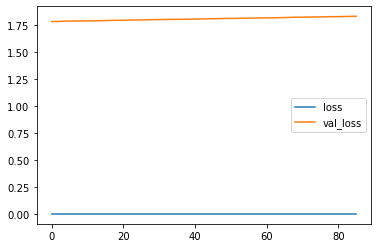

In [16]:
# Exploring what my model history looks like

# model.history.history : Gives History of our losses 


# loss = Loss of my training set
# val_loss = Loss of my test set

model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [17]:
# Dropout help us to prevent overfitting


# Dropout : It can be added to layers to "turn-off" neurons during training to prevent overfitting.
#            Basically each Dropout layer will "drop" a user-defined % of neurons units in the previous layer every batch.


# (0.5) is rate : Rate is the probability that we are going to randomly turnoff the actual neuron (0 : None, 1 : 100%)


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model1 = Sequential()

model1.add(Dense(100,activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(50,activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(25,activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(15,activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(5,activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(1,activation='sigmoid'))


# After each epochs of training our X_train we will run test data check our losses on the test data which will help us to keep
# track of how well our model is performing not just on our training data but also on our test data

model1.compile(loss = "binary_crossentropy",optimizer='adam')

model1.fit(x = X_train, y = y_train, epochs=250, validation_data=(X_test,y_test), callbacks=[early_stop])

Epoch 1/250
8/8 [==============================] - 0s 15ms/step - loss: 0.7221 - val_loss: 0.6956
Epoch 2/250
8/8 [==============================] - 0s 3ms/step - loss: 0.7296 - val_loss: 0.6903
Epoch 3/250
8/8 [==============================] - 0s 3ms/step - loss: 0.7191 - val_loss: 0.6851
Epoch 4/250
8/8 [==============================] - 0s 3ms/step - loss: 0.7138 - val_loss: 0.6872
Epoch 5/250
8/8 [==============================] - 0s 3ms/step - loss: 0.6874 - val_loss: 0.6902
Epoch 6/250
8/8 [==============================] - 0s 3ms/step - loss: 0.6860 - val_loss: 0.6901
Epoch 7/250
8/8 [==============================] - 0s 3ms/step - loss: 0.6941 - val_loss: 0.6896
Epoch 8/250
8/8 [==============================] - 0s 3ms/step - loss: 0.6857 - val_loss: 0.6897
Epoch 9/250
8/8 [==============================] - 0s 3ms/step - loss: 0.7045 - val_loss: 0.6905
Epoch 10/250
8/8 [==============================] - 0s 3ms/step - loss: 0.6805 - val_loss: 0.6899
Epoch 11/250
8/8 [==========

Epoch 167/250
8/8 [==============================] - 0s 4ms/step - loss: 0.4377 - val_loss: 0.2881
Epoch 168/250
8/8 [==============================] - 0s 3ms/step - loss: 0.3999 - val_loss: 0.2876
Epoch 169/250
8/8 [==============================] - 0s 4ms/step - loss: 0.4318 - val_loss: 0.2872
Epoch 170/250
8/8 [==============================] - 0s 3ms/step - loss: 0.3839 - val_loss: 0.2786
Epoch 171/250
8/8 [==============================] - 0s 3ms/step - loss: 0.4507 - val_loss: 0.2790
Epoch 172/250
8/8 [==============================] - 0s 4ms/step - loss: 0.4734 - val_loss: 0.3084
Epoch 173/250
8/8 [==============================] - 0s 3ms/step - loss: 0.4267 - val_loss: 0.3167
Epoch 174/250
8/8 [==============================] - 0s 3ms/step - loss: 0.4152 - val_loss: 0.3005
Epoch 175/250
8/8 [==============================] - 0s 3ms/step - loss: 0.4138 - val_loss: 0.2942
Epoch 176/250
8/8 [==============================] - 0s 3ms/step - loss: 0.3727 - val_loss: 0.2941
Epoch 177/

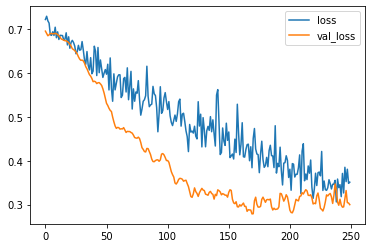

In [18]:
# Exploring what my model history looks like

# model.history.history : Gives History of our losses 


# loss = Loss of my training set
# val_loss = Loss of my test set

model1_loss = pd.DataFrame(model1.history.history)
model1_loss.plot()

In [19]:
# It will return our models loss

model1.evaluate(X_test,y_test,verbose=0)    # verbose = 0 : we will not see bunch of output  

0.2996746897697449

### 5.) Check Model Accuracy

In [20]:
pred = model1.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [21]:
# To check the accuracy of the model : Column : f1-score , Row : accuracy --> 89%


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        32
           1       0.87      0.90      0.88        29

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [22]:
# For detail explanation of confusion_matrix } https://www.infinitycodex.in/confusion-matrix-and-classification

print(confusion_matrix(y_test,pred))

[[28  4]
 [ 3 26]]


In [24]:
print(accuracy_score(y_test,pred))

0.8852459016393442


# Our Model is 89% accurate

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train,y_train)

lr_pred = lr_model.predict(X_test)

# To check the accuracy of the model : Column : f1-score , Row : accuracy --> 90%


from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,lr_pred))

In [ ]:
print(confusion_matrix(y_test,lr_pred))

In [ ]:
from sklearn.svm import SVC

svm_model=SVC(kernel="rbf")              
svm_model.fit(X_train,y_train)

svm_pred = svm_model.predict(X_test)

# To check the accuracy of the model : Column : f1-score , Row : accuracy --> 90%


from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,svm_pred))

In [ ]:
print(confusion_matrix(y_test,svm_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=1000)

rf_model.fit(X_train,y_train)


rf_pred = rf_model.predict(X_test)

# To check the accuracy of the model : Column : f1-score , Row : accuracy --> 90%


from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,rf_pred))

In [ ]:
print(confusion_matrix(y_test,rf_pred))

# Save Model

In [ ]:
import joblib
joblib.dump(lr_model,"Heart_Disease_Prediction.pkl")

In [2]:
import joblib
m = joblib.load('Heart_Disease_Prediction.pkl')

In [3]:
m.predict([[55,1,185,288,1,190,1,3.3,0,1,0,0,1,0,0,1,1,0,1]])

array([0], dtype=int64)